# TASK 1 : TITANIC SURVIVAL PREDICTION

# EXPLANATION OF DATA

**-PassengerId:** A unique identifier assigned to each passenger.
**-Survived:** Indicates whether or not the passenger survived the disaster. 1 means "survived", 0 means "not survived".
**-Pclass:** Class in which the passenger was traveling. 1 for the first class, 2 for the second class and 3 for the third class.
**-Name: The passenger's name.**
**-Sex:** The gender of the passenger, either “male” for masculine or “female” for feminine.
**-Age:** The age of the passenger.
**-SibSp:** The number of siblings or spouses on board the Titanic.
**-Parch:** The number of parents or children on board the Titanic.
**-Ticket:** The ticket number.
**-Fare:** The price of the ticket paid by the passenger.
**-Cabin:** The passenger's cabin number (if known).
**-Embarked:** The passenger's embarkation port (C = Cherbourg, Q = Queenstown, S = Southampton).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset="Titanic-Dataset.csv"
data=pd.read_csv(dataset)

#  Exploration des données

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Valeurs manquantes
Le **`nan`** est une constante qui indique que la valeur donnée n’est pas légale - **`Not a Number`**.  

Pour identifier le nombre de valeurs NaN par colonne, nous pouvons utiliser : 
* la méthode **`isna()`** 
* puis ajouter la méthode **`sum()`** pour compter les valeurs NaN.

In [108]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [106]:
data.isnull().sum().any()

True

In [110]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Delete missing values

In [4]:
data_selected = data[['Survived', 'Pclass', 'Sex', 'Age']].copy()
data_selected.dropna(axis=0, inplace=True)
data_selected.head()
data_selected.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

## Encoding Data
by replacing the values **'male'** with 0 and **'female'** with 1 in the 'Sex' column of the data_selected dataframe. This means that every occurrence of "male" will be replaced by 0 and every occurrence of "female" will be replaced by 1.

In [5]:
# Remplacer les valeurs "male" par 0 et "female" par 1 dans la colonne "Sex"
data_selected['Sex'] = data_selected['Sex'].replace({'male': 0, 'female': 1})
data_selected.head(10)

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0
9,1,2,1,14.0
10,1,3,1,4.0


## Visualisation

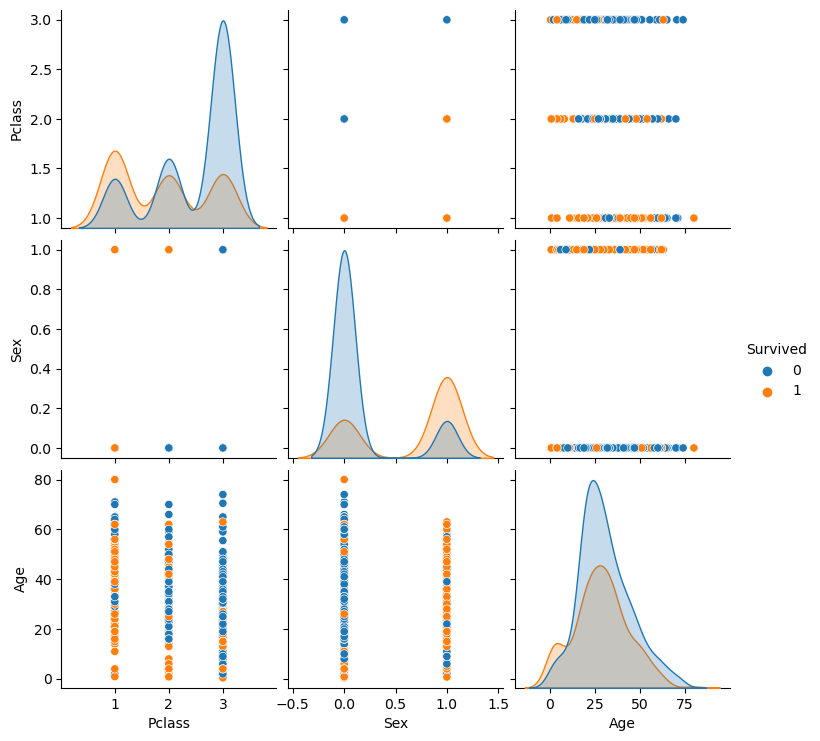

In [6]:
import seaborn as sns
# Créer un graphique de pair plot avec la variable cible 'Survived' comme hue
sns.pairplot(data=data_selected, hue='Survived')
plt.show()  # Assurez-vous d'avoir également importé matplotlib.pyplot (plt) pour afficher le graphique


<AxesSubplot:>

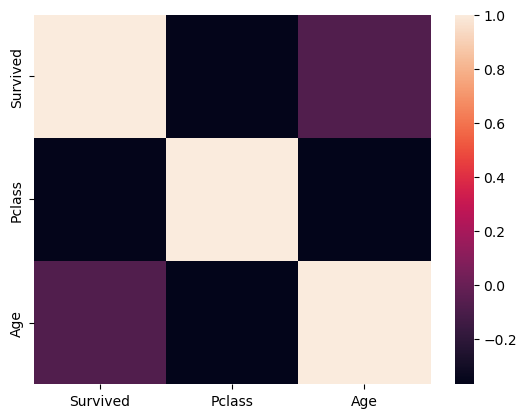

In [113]:
sns.heatmap(data_selected.corr())

# Train the model
### KNN (K voisins les plus proches) 
k-NN (k-Nearest Neighbor), one of the simplest machine learning algorithms, is non-parametric and lazy in nature. Non-parametric means that there are no assumptions for the distribution of the underlying data, i.e. the structure of the model is determined from the dataset.
**sklearn.neighbors** is the module used to implement nearest neighbor learning.

# Choose the number of k 
### using the elbow method

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

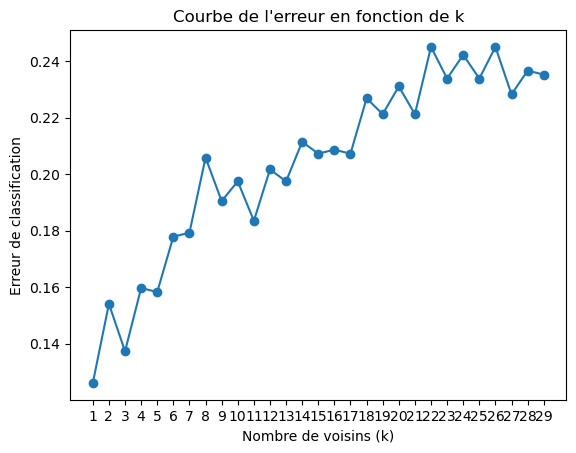

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
# Créer une liste vide pour stocker les valeurs d'erreur
vect_err = []
# Créer une plage de valeurs de k à tester
k_values = range(1, 30)
# Parcourir chaque valeur de k
for k in k_values:
    # Initialiser le modèle k-NN avec k voisins
    knn = KNeighborsClassifier(n_neighbors=k)
    # Entraîner le modèle sur les données
    knn.fit(X, y)
    # Calculer l'erreur de classification en utilisant la méthode score
    error = 1 - knn.score(X, y)
    # Ajouter l'erreur à la liste des erreurs
    vect_err.append(error)
# Tracer la courbe de l'erreur en fonction de k
plt.plot(k_values, vect_err, marker='o', linestyle='-')
plt.title('Courbe de l\'erreur en fonction de k')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Erreur de classification')
plt.xticks(k_values)
# plt.grid(True)
plt.show()


In [10]:
minimum=np.argmin(vect_err)
print(minimum+1)

1


# Normalisation 


In [11]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les caractéristiques numériques
caracteristiques_numeriques = ['Age']

# Créer un objet de mise à l'échelle
mise_a_lechelle = StandardScaler()

# Adapter la mise à l'échelle aux caractéristiques numériques et transformer les données
data_selected[caracteristiques_numeriques] = mise_a_lechelle.fit_transform(data_selected[caracteristiques_numeriques])
data_selected.head()

,Survived,Pclass,Sex,Age
0,0,3,0,-0.530377
1,1,1,1,0.571831
2,1,3,1,-0.254825
3,1,1,1,0.365167
4,0,3,0,0.365167


# Training data

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
X = data_selected.drop(columns=["Survived"])  # Caractéristiques
y = data_selected["Survived"]  # Variable cible

In [13]:
knn.fit(X, y)
knn.score(X, y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8613445378151261

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraîner le modèle sur l'ensemble d'entraînement
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

## Evaluate the model

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score ,confusion_matrix, classification_report
y_pred = knn.predict(X_test)

# Calculer la précision
precision = precision_score(y_test, y_pred)

# Calculer le rappel
recall = recall_score(y_test, y_pred)

# Calculer le score F1
f1 = f1_score(y_test, y_pred)
# Évaluer les performances du modèle sur l'ensemble de test
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)
# Afficher les résultats
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7272727272727273
Precision: 0.717948717948718
Recall: 0.5
F1 Score: 0.5894736842105263


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [120]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("\nRapport de classification:")
print(class_report )

Matrice de confusion:
[[76 11]
 [28 28]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        87
           1       0.72      0.50      0.59        56

    accuracy                           0.73       143
   macro avg       0.72      0.69      0.69       143
weighted avg       0.73      0.73      0.72       143



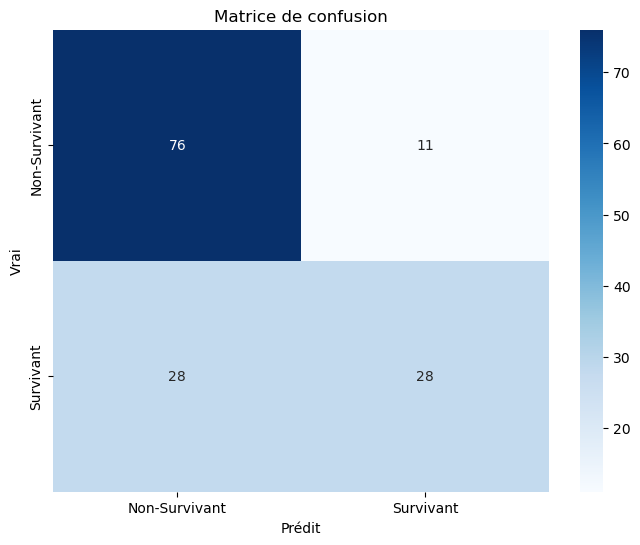

In [119]:

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Survivant', 'Survivant'], 
            yticklabels=['Non-Survivant', 'Survivant'])
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title('Matrice de confusion')
plt.show()
